In [1]:
#Load random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Pandas
import pandas as pd
#Numpy
import numpy as np

In [ ]:
# Data and Notebook Setup

In [41]:
#1. Loading and reading the data from thr csv file

fname = "IMA Recommendation Simulation Data.csv"
dataset = pd.read_csv(fname)

In [46]:
# a. Shape of IMA Recommendation Simulation Data file

dataset.shape

(161563, 16)

In [91]:
# b. Finding how many unique categories there are for CurrentCondition

uniqueCategories = dataset['CurrentCondition'].unique()
print(uniqueCategories)
numOfCategories = len(uniqueCategories)
print("Number of Unique Categories in Current Condition: ", numOfCategories)

['Accepted' 'Rejected' 'Withdrawn' 'Waiting On Acceptance' 'Cancelled' nan
 'Waiting On Recommendation' 'NoPace']
Number of Unique Categories in Current Condition:  8


In [ ]:
# Exploratory Data Analysis
# 2. Exploratory Data Analysis is a critical part of a Data Scientist's Job

In [53]:
# a. Is request_id unique?
if dataset['request_id'].is_unique == True:
    print("request_id is unique")
else:
    print("request_id is not unique")
    



request_id is not unique


In [138]:
duplicate = dataset[dataset.duplicated()]
duplicate

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition,is_train
81224,f0293ccd87b445f5989c6c68726608dc,3,Fri,147,V,151.0,2,45007.0,3,RED,983,972,-0.621826,-0.353353,Withdrawn,False


In [140]:
ids = dataset["request_id"]
dataset[ids.isin(ids[ids.duplicated()])]

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition,is_train
81223,f0293ccd87b445f5989c6c68726608dc,3,Fri,147,V,151.0,2,45007.0,3,RED,983,972,-0.621826,-0.353353,Withdrawn,False
81224,f0293ccd87b445f5989c6c68726608dc,3,Fri,147,V,151.0,2,45007.0,3,RED,983,972,-0.621826,-0.353353,Withdrawn,False


In [54]:
# b. is there missing data? Yes there is missing data
print(dataset.isnull().values.any())

True


In [64]:
# if so which columns have missing data

# finding features that containing no missing values and missing values
dataset.isnull().sum()

Unnamed: 0                 0
request_id                 0
week_id                    0
weekday                    0
miles                      0
order_equipment_type       0
order_distance          4678
order_num_stops            0
order_origin_weight       19
lead_days                  0
color                      0
origin_dat_ref             0
dest_dat_ref               0
rate_norm                181
est_cost_norm             39
CurrentCondition         118
dtype: int64

In [71]:
# dataset['order_distance'].isnull().values.any()
# dataset['order_origin_weight'].isnull().values.any()
# dataset['rate_norm'].isnull().values.any()
# dataset['est_cost_norm'].isnull().values.any()
# dataset['CurrentCondition'].isnull().values.any()

for col in dataset:
    if dataset[col].isnull().values.any() == True:
        print(col) # prints features that contain missing values
    else: 
        pass


order_distance
order_origin_weight
rate_norm
est_cost_norm
CurrentCondition


In [72]:
# c. Are there any features you would consider highly correlated?
# Limit to two pairs and describe why you selected the two pairs
# demonstrate numerically and visually import seaborn as sns
# Show two visualizations - correlation matrix and heatmap used as visualization

                      week_id     miles  order_distance  order_num_stops  \
week_id              1.000000  0.019201        0.019802         0.009899   
miles                0.019201  1.000000        0.982291         0.057819   
order_distance       0.019802  0.982291        1.000000              NaN   
order_num_stops      0.009899  0.057819             NaN         1.000000   
order_origin_weight  0.000422  0.012212        0.009852         0.025359   
lead_days            0.007609  0.025197        0.027990         0.037197   
origin_dat_ref       0.001539  0.069189        0.066862         0.004474   
dest_dat_ref         0.010358  0.248031        0.246584         0.004028   
rate_norm            0.022749  0.697896        0.689225         0.061158   
est_cost_norm        0.036973  0.742555        0.730472         0.108425   
is_train             0.000386  0.003858        0.004116         0.001907   

                     order_origin_weight  lead_days  origin_dat_ref  \
week_id         

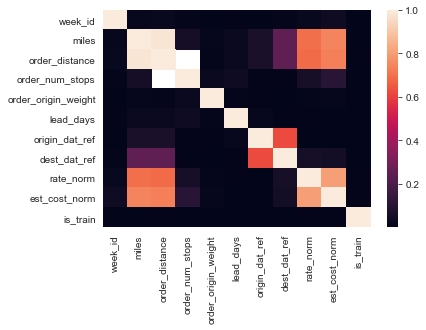

In [124]:
import seaborn as sns

corr_matrix = dataset.corr().abs()
print(corr_matrix)
sns.heatmap(corr_matrix)

In [125]:
# Based on the correlation matrix, I would choose the pair closest to 1.0. Thw two pairs I would pick are
# order_distance and order_num_stops & miles and est_cost_norm because the each of them are two different variables



In [126]:
import matplotlib.pyplot as plt

In [127]:
col = dataset.columns.values
number_of_columns=len(col)
number_of_rows = len(col)-1/number_of_columns


The summary of data is: 
              week_id          miles  order_distance  order_num_stops  \
count  161563.000000  161563.000000   156885.000000    161563.000000   
mean        2.440559     624.808490      604.038876         2.030781   
std         1.125998     563.541693      555.309102         0.198188   
min         1.000000       1.000000        0.000000         2.000000   
25%         1.000000     236.000000      225.000000         2.000000   
50%         2.000000     450.000000      433.000000         2.000000   
75%         3.000000     820.000000      795.000000         2.000000   
max         4.000000    6171.000000     3274.000000         4.000000   

       order_origin_weight      lead_days  origin_dat_ref   dest_dat_ref  \
count         1.615440e+05  161563.000000   161563.000000  161563.000000   
mean          3.478955e+04       5.302885      502.882343     528.266973   
std           5.731309e+04       5.861072      256.895274     266.437711   
min           1.0000

Text(0.5, 1.0, 'Data Summary')

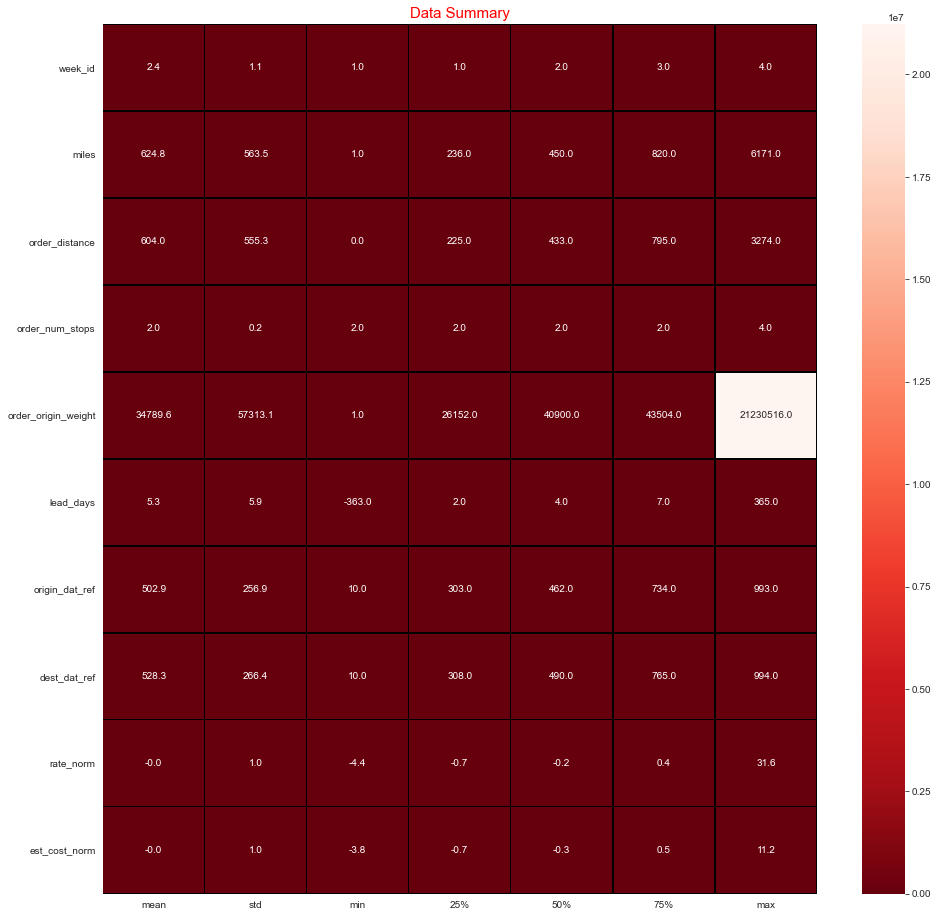

In [255]:
data_summary_figsize=(16,16)
corr_matrix_figsize=(16,16)
data_summary_figcol="Reds_r"
corr_matrix_figcol='Blues'
corr_matrix_annot=False
pairplt_col='all'
pairplt=False
feature_division_figsize=(12,12)

print('\nThe summary of data is: \n',dataset.describe())
plt.figure(figsize=data_summary_figsize)
sns.heatmap(dataset.describe()[1:].transpose(), annot= True, fmt=".1f",
            linecolor="black", linewidths=0.3,cmap=data_summary_figcol)
plt.title("Data Summary", fontsize=(15), color="red")
    

In [276]:
# Dataset featuring no duplicates
fname = "IMA Recommendation Simulation Data.csv"
df = pd.read_csv(fname)

In [277]:
df2 = df.drop_duplicates()

In [278]:
#Taking away duplicate orders
duplicate2 = df2[df2.duplicated()]
duplicate2

,Unnamed: 0,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition


In [279]:
selected_columns = df2[["request_id","miles", "rate_norm", "est_cost_norm", "CurrentCondition"]]
#Index into desired columns to copy

new_df = selected_columns.copy()
new_df.head()

,request_id,miles,rate_norm,est_cost_norm,CurrentCondition
0,c2653eda11cd4d94879d1946392eb2b5,1856,2.273442,2.138631,Accepted
1,65e3dcc84a2246e68ea8636a967b31b2,56,-0.971030,-1.017024,Rejected
2,0a86f005640a4204b46c95ca033a7ced,259,-0.393352,-0.475805,Accepted
3,1105b4bc7b444f7985d4ad810e7acbc2,71,-0.706546,-0.765855,Rejected
4,de538100bb0f4137961b9551640ef35e,1182,1.014233,0.469273,Accepted


In [280]:
new_df = new_df.drop(['request_id'], axis = 1)

In [281]:
new_df.head(10)

,miles,rate_norm,est_cost_norm,CurrentCondition
0,1856,2.273442,2.138631,Accepted
1,56,-0.971030,-1.017024,Rejected
2,259,-0.393352,-0.475805,Accepted
3,71,-0.706546,-0.765855,Rejected
4,1182,1.014233,0.469273,Accepted
5,1205,0.425589,1.442384,Accepted
6,952,1.315257,1.643050,Accepted
7,671,0.570572,-0.126011,Withdrawn
8,154,-0.154330,-1.282368,Accepted
9,665,-0.979127,-0.828261,Withdrawn


In [282]:
# Thought process was to use the target variable, Current Condition, to get numerical values for each category
# CurrentConditionDummyCol = pd.get_dummies(new_df['CurrentCondition'])
# new_df = pd.concat((new_df, CurrentConditionDummyCol), axis =1)

In [283]:
new_df.head(10)

,miles,rate_norm,est_cost_norm,CurrentCondition
0,1856,2.273442,2.138631,Accepted
1,56,-0.971030,-1.017024,Rejected
2,259,-0.393352,-0.475805,Accepted
3,71,-0.706546,-0.765855,Rejected
4,1182,1.014233,0.469273,Accepted
5,1205,0.425589,1.442384,Accepted
6,952,1.315257,1.643050,Accepted
7,671,0.570572,-0.126011,Withdrawn
8,154,-0.154330,-1.282368,Accepted
9,665,-0.979127,-0.828261,Withdrawn


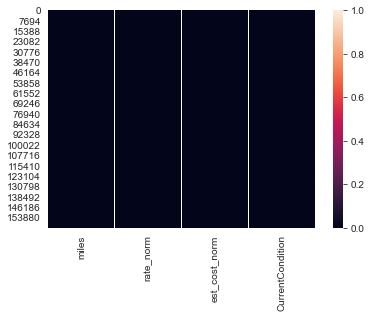

In [284]:
sns.heatmap(new_df.isnull())

In [303]:
# interpolating missing NaN values
new_df.copy().isnull().sum()
new_df['rate_norm'] = new_df['rate_norm'].interpolate()
new_df['est_cost_norm'] = new_df['est_cost_norm'].interpolate()

In [330]:
# new_df = new_df[new_df['CurrentCondition'].notna()]
# df = new_df

# convert CurrentCondition to number
new_df.CurrentCondition = pd.Categorical(new_df.CurrentCondition)
new_df['CurrentCondition'] = new_df.CurrentCondition.cat.codes



X = new_df.copy()
y = new_df['CurrentCondition'].copy()
del X['CurrentCondition']


# 3. Create and train and test Split
# Split dataset to 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(129250, 3)
(32313, 3)
(129250,)
(32313,)


In [331]:
# 3. Create a Train/Test Split

#Create Test and Train data
# new_df['is_train'] = np.random.uniform(0, 1, len(new_df)) <= .7
# pd.set_option('display.max_columns', None)

# X = new_df[0:2].values
# y = new_df['CurrentCondition'].values

In [332]:
# #Split the dataset to 70% training and 30% testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [333]:
# #Dedision Tree Calssifier
# #np.any(np.isnan(mat))
# from sklearn import tree
# dt_clf = tree.DecisionTreeClassifier(max_depth = 5)#Build
# dt_clf.fit(X_train,y_train) # Train
# dt_clf.score(X_test,y_test) # Test

# y_pred = dt_clf.predict(X_test) # Predict
# dt_clf.score(X_test,y_test)




0.5967257760034661

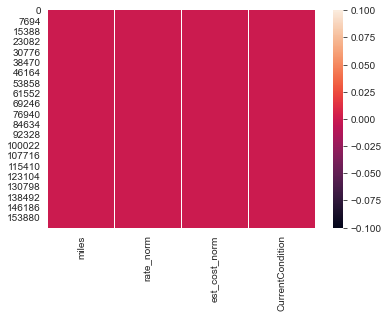

In [334]:
sns.heatmap(new_df.isnull()) # finding out if there are null values in dataset

In [ ]:
# 4. Build two classifiers that will produce predictions on the Current Condition of a load

Feature: 0, Score: 0.30148
Feature: 1, Score: 0.34025
Feature: 2, Score: 0.35827


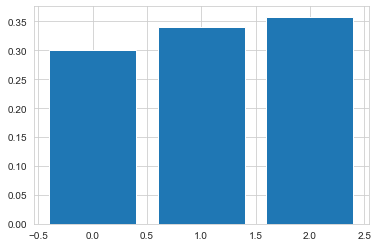

CurrentCondition of load prediction:  0.7019775322625569


In [346]:
#Random Forest Classifier
from matplotlib import pyplot
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print("CurrentCondition of load prediction: ", rf_clf.score(X_test, y_test))

In [344]:
# # Gradient Boosting Classifier
# gb_clf = ensemble.GradientBoostingClassifier()
# gb_clf.fit(X_train, y_train)
# print("CurrentCondition of load prediction: ", gb_clf.score(X_test, y_test))

In [340]:
# # Tuning the Gradient Boosting Classifier
# gb_clf = ensemble.GradientBoostingClassifier(n_estimators = 40)
# gb_clf.fit(X_train, y_train)
# print("CurrentCondition of load prediction: ", gb_clf.score(X_test, y_test))

0.6015845015937857

In [341]:
# # Naive Bayes Classifier
# from sklearn.naive_bayes import GaussianNB
# nb_clf = GaussianNB()
# nb_clf.fit(X_train, y_train)
# nb_clf.score(X_test, y_test)

0.5859561167332034

Feature: 0, Score: -0.00823
Feature: 1, Score: 0.02319
Feature: 2, Score: 0.02387


/Users/sairamsunkam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


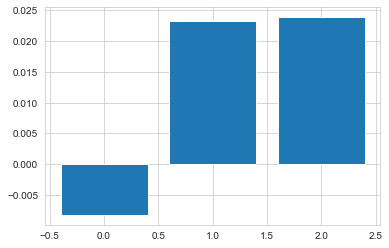

In [349]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)
importance = lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# a. The random forest classifier worked better than the K-Nearest Neighbor Classifier by the fact that
# the prediction of the Random forest was higher by 4% than the Logistic Regression Classifier.
# Not only is Random Forest predicting well, it deals with handling unbalanced data because 
# we had a lot of missing values, the classifier made
# sure that it would minimize the overall error rate of the what is predicting.
# b. In terms of feature importance, the est_cost_norm was the most important feature using the random forest,
# however, it seems like all three features had around the same amount of importance in this case.
# In the Logistic Regression, the features were not used well, the est_cost_norm was still the highest but not by
# much with rate_norm. Those two features are very important to any model as a whole.
# c. Because we are not using too many features that are irrelevant to these models. There would not be a concern of 
# overfitting. The dataset that that modified for the models is not complex as well as the training and testing
# data is not too much as well. However, if we were to use the original dataset, the model would have trouble in not
# overfitting as it is a complex dataset.

In [ ]:
# 5. Questions about the dataset
# Why was the dataset given missing so many values?
# Why are there cases in the dataset where we are lossing profit, but accepting the order?

# As an employee, I would talk to the people around me that are more experienced in handling data cleaning
# and data handling and they can answer why there are a lot of data that is missing.

# I would ask the business analyst why as a company are we doing this and they would give the run-down
# on why the business is handling the process this way.